In [2]:
# To Supress the warnings
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# import basic library
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Reading and Understanding the data

In [4]:
# Importing and reading the dataset
bike_df = pd.read_csv('day.csv',index_col=0)
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Check the shape of dataset
bike_df.shape

(730, 15)

In [6]:
# Information about the each features in the dataset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


### Exploratory data Analysis

In [7]:
# Number of features has null values
null_count = (bike_df.isnull().sum() > 0).sum()
null_count

0

In [8]:
# Check for any duplicates
bike_df.duplicated().sum()

0

- Expect 'dteday' column all others are either integer or float type 
- Also there is no missing values present in each columns
- No duplicates present

In [9]:
# Number of uniques values present in each features
bike_df.nunique()

dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [10]:
# Droping 'dteday' column as we already have year and month to work with
bike_df.drop('dteday', axis = 1 , inplace = True)

# Droping 'casual' and 'registered' columns since we had the cnt column which is sum of these two
bike_df.drop(['casual','registered'], axis = 1, inplace = True)

In [11]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
2,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
3,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
# Checking for the data types
bike_df.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

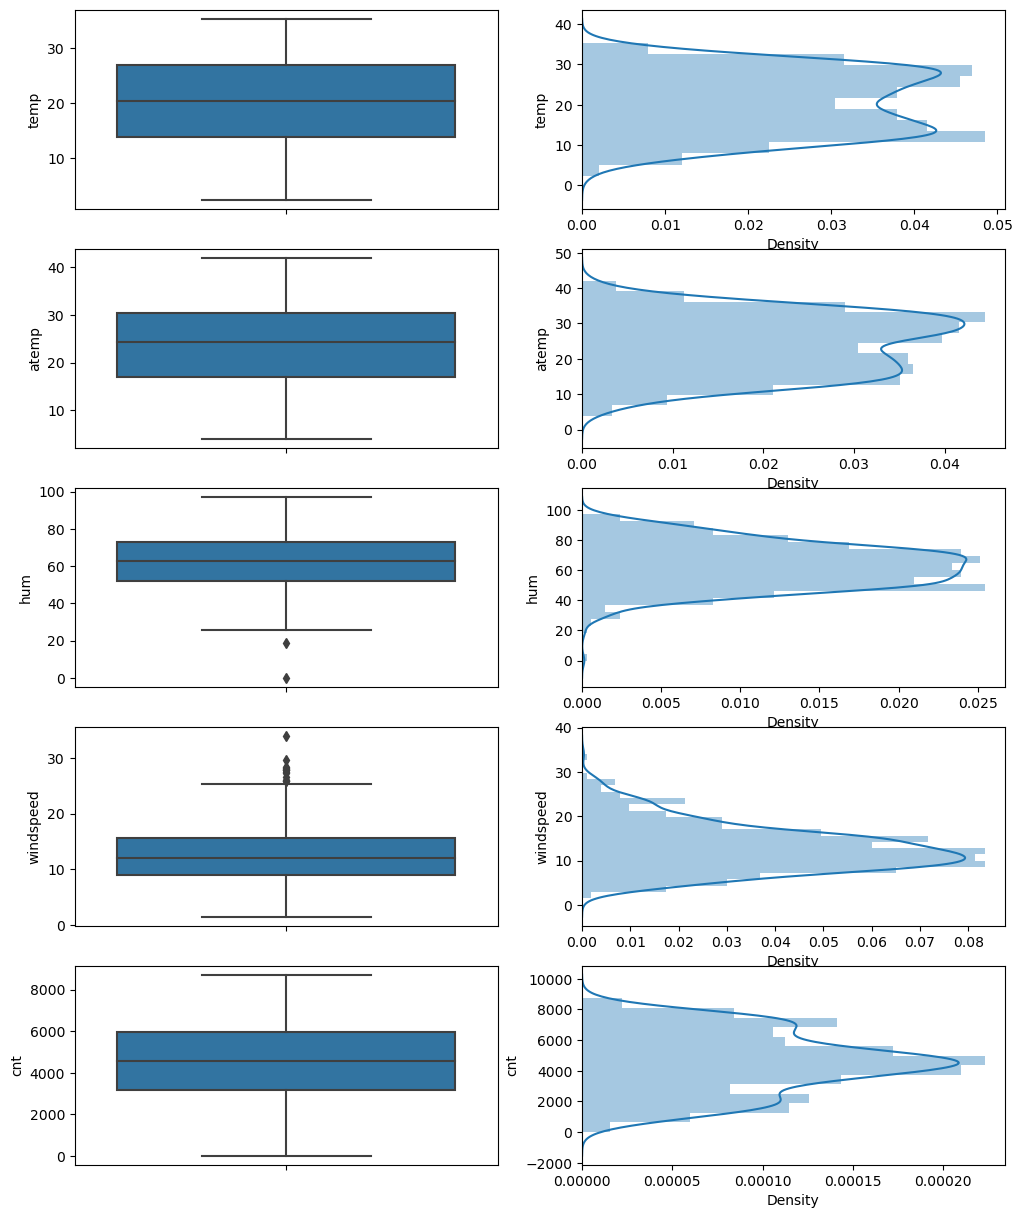

In [13]:
# Ploting the distribution of continuous numerical variable.
a,b,c = 5,2,1
plt.figure(figsize=(12,15))

numerical_features = [ 'temp', 'atemp', 'hum', 'windspeed','cnt' ]

for feature in numerical_features:
    plt.subplot(a,b,c)
    sns.boxplot(data=bike_df, y=feature)
    c+=1
    
    plt.subplot(a,b,c)
    sns.distplot( bike_df[feature],vertical=True)
    c+=1

- The above plot shows that there is not much outliers present in it.
- And more over distributed normally.

In [14]:
# Converting some of the features into categorical features 
# which make easier to read while we create dummy variables 

bike_df['season'].replace( {1:'spring', 2:'summer', 3:'fall', 4:'winter'}, inplace= True )

bike_df['weathersit'].replace( {1:'good',2:'moderate',3:'bad',4:'severe'}, inplace=True )

bike_df['mnth'].replace( {1: 'january',2: 'february',3: 'march',4: 'april',5: 'may',6: 'june', 7: 'july',
                  8: 'august',9: 'september',10: 'october',11: 'november',12: 'december'}, inplace=True )

bike_df['weekday'].replace( {0: 'sun',1: 'mon',2: 'tue',3: 'wed',
                             4: 'thu',5: 'fri',6: 'sat'}, inplace =True )


In [15]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,spring,0,january,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
2,spring,0,january,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
3,spring,0,january,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
4,spring,0,january,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
5,spring,0,january,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
# Listing down the continuous numerical variables 
num_var = [feature for feature in bike_df.columns 
           if bike_df[feature].dtypes!='O' and bike_df[feature].nunique() > 12  ]
num_var

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

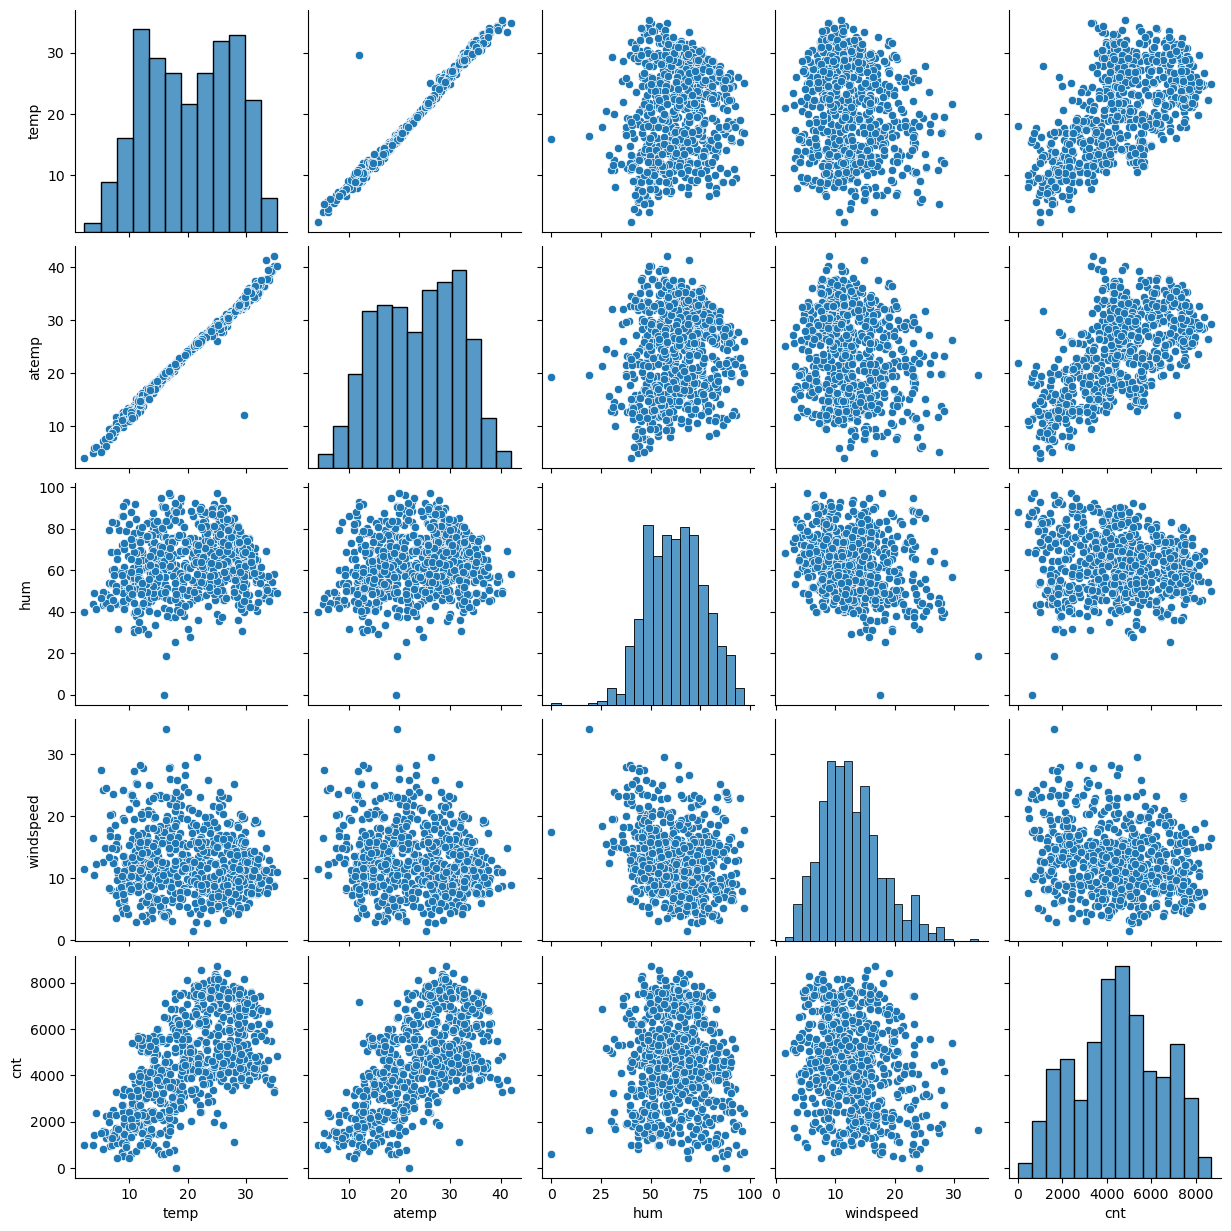

In [17]:
# ploting the pair plot on continuous variable
sns.pairplot(bike_df[num_var])
plt.show()

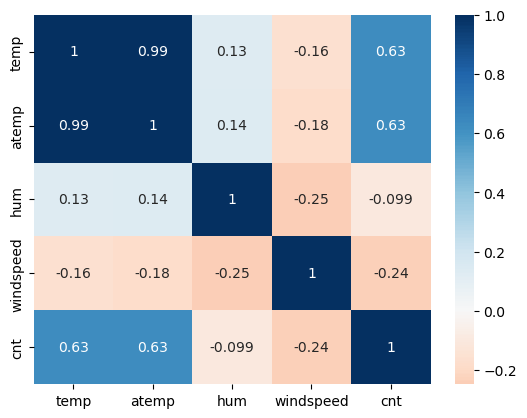

In [18]:
# Analysing correlation between continuous variable
sns.heatmap(  bike_df[num_var].corr(), cmap='RdBu', annot=True ,center=0  )
plt.show()

### Insights
    - 'temp' and 'atemp' are jighly correlated to eachother
    - And also 'temp' and 'atemp' has highest correlation with target varialbe 'cnt'  

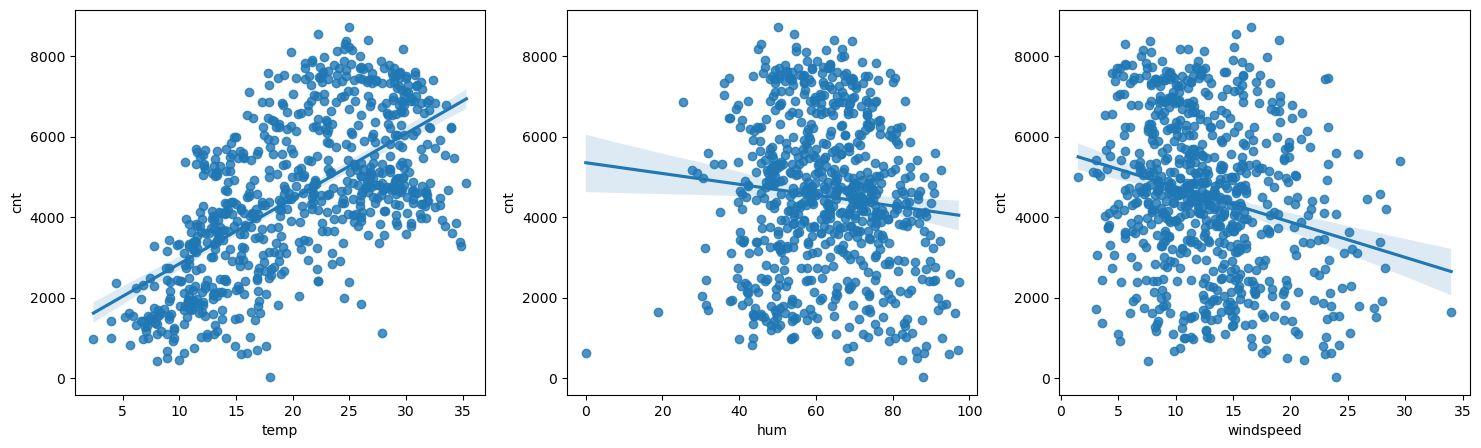

In [19]:
lst1 = ['temp', 'hum', 'windspeed']
a=1
plt.figure(figsize=(18,5))
for i in lst1:
    plt.subplot(1,3,a)
    sns.regplot(data= bike_df, x=i, y= 'cnt')
    a+=1
    

### Insights
        - Temperature is positevely correlated to the demend.
        - Humidity is slightly negatively correlated to demand eventhough the values are scattered.
        - Windspeed is clearly negative correlated even the values are mostly scattered.

In [20]:
# Analysing categorical column
categorical_features = [feature for feature in bike_df.columns 
                         if bike_df[feature].dtypes == 'O' 
                                or bike_df[feature].nunique() <= 12 ]
categorical_features

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

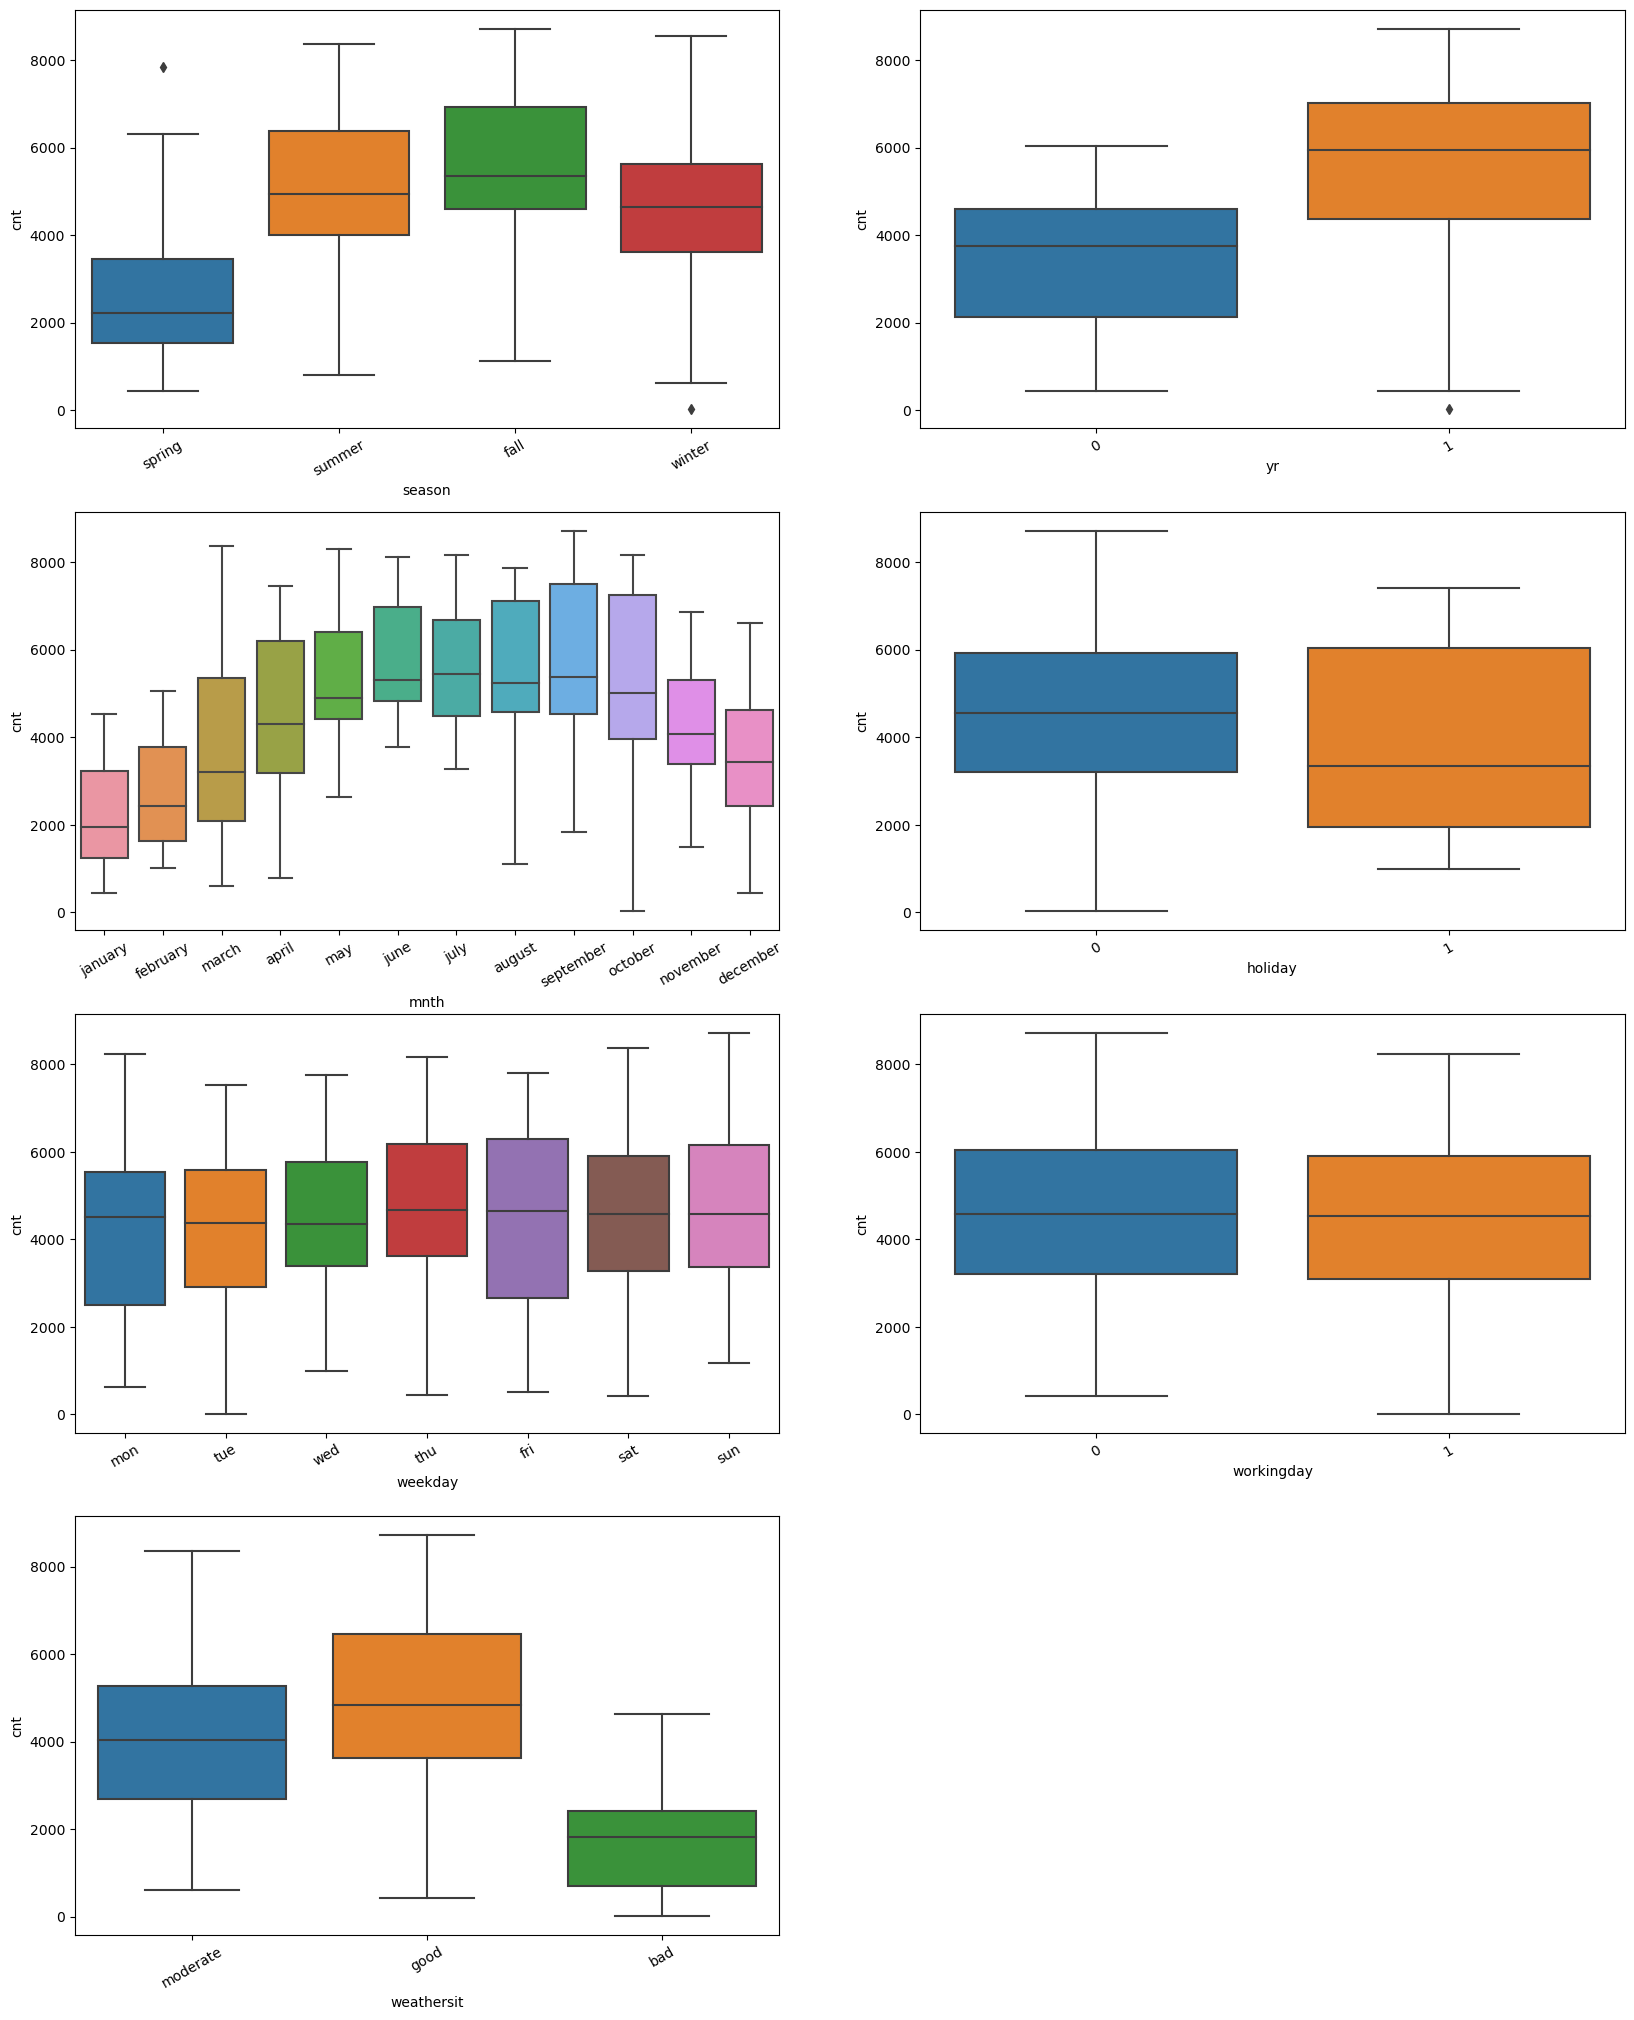

In [21]:
# Ploting the distribution of categorical variable with target variable
a,b,c=4,2,1
plt.figure(figsize=(20,25))

for feature in categorical_features:    
    plt.subplot(a,b,c)
    sns.boxplot (data=bike_df, x=feature , y= 'cnt')
    plt.xticks(rotation=30)
    c+=1

### Insights:

     - Season Fall has highest demand for rental bikes
     - We can see that demand for second year has grown
     - Till june Demand is continuously growing, September month has highest demand.After demand is decreasing 
     - During September, bike sharing is more. During the year end and beginning, it is    less, probably due to extereme weather conditions
     - With holiday the demand decreases.
     - Weekday has the constant demand hence we can't infer.
     - Clear weather has highest demand.
 

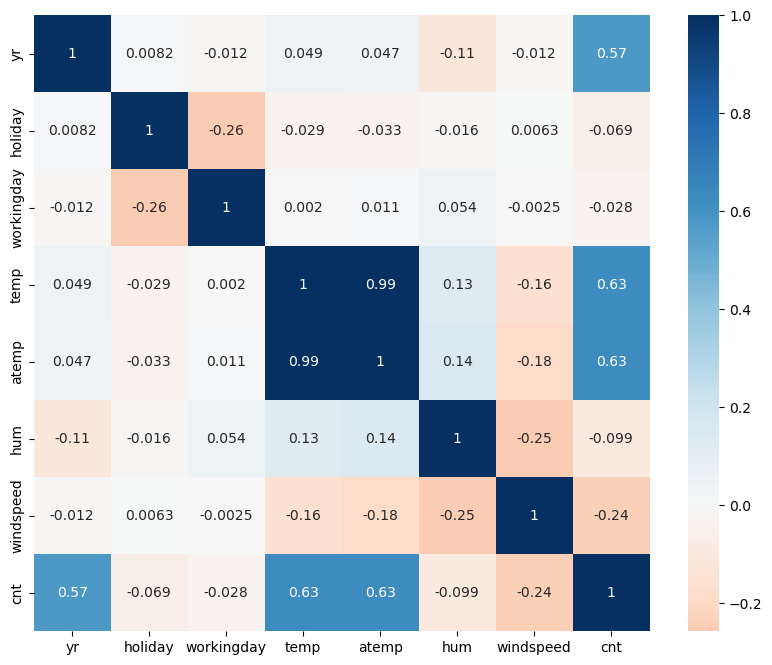

In [22]:
# Analysing the correlation between entire variables
plt.figure(figsize=(10,8))
sns.heatmap(bike_df.corr(), cmap='RdBu', annot=True, center=0,square=True )
plt.show()

## Data Preparation

In [23]:
# Creating dummy variable.
bike_df = pd.get_dummies(data=bike_df,columns=['season', 'mnth', 'weekday'] ,drop_first=True )

In [24]:
# Weathersit feature we dont drop first column, since severe weather might get lost.
bike_df = pd.get_dummies( data= bike_df, columns=['weathersit'] )

In [25]:
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_september,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,1,0,0,0,1,0
5,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,1,0


In [26]:
# Print the total columns
bike_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_august',
       'mnth_december', 'mnth_february', 'mnth_january', 'mnth_july',
       'mnth_june', 'mnth_march', 'mnth_may', 'mnth_november', 'mnth_october',
       'mnth_september', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_bad',
       'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [27]:
# shape of the dataset prepared before bulding the model
bike_df.shape

(730, 31)

## Model Building

In [28]:
# Importing the library for splitting the data to test and train
from sklearn.model_selection import train_test_split

In [29]:
# Spliting the data
np.random.seed(0)
df_train, df_test = train_test_split( bike_df , train_size= 0.7, random_state= 100)

In [30]:
# printing the shape of train and test data
print('Train_Shape: ', df_train.shape )
print('Test_Shape: ', df_test.shape )

Train_Shape:  (510, 31)
Test_Shape:  (220, 31)


## Scaling the data

In [31]:
# import library
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
# Fitting the scaler to continuous features
num_col = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_col] = scaler.fit_transform( df_train[num_col])

In [34]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_september,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.625490,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
# Dividing X and y set
y_train = df_train.pop('cnt')
X_train = df_train

In [36]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_september,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
instant,,,,,,,,,,,,,,,,,,,,,
577,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,1,0
427,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,1
729,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,1,0,0,0,0,0,0,1,0
483,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,0,1
112,0,0,0,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [37]:
y_train.head()

instant
577    0.827658
427    0.465255
729    0.204096
483    0.482973
112    0.191095
Name: cnt, dtype: float64

## Building the model using RFE method 

In [38]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [39]:
# linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [40]:
# Reducing the number of features to 15 using RFE automated approach
rfe = RFE(lr, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [41]:
# Features selected by RFE based o their ranking

list( zip( X_train, rfe.support_, rfe.ranking_ ) )

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_august', False, 11),
 ('mnth_december', False, 2),
 ('mnth_february', False, 3),
 ('mnth_january', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 13),
 ('mnth_march', False, 16),
 ('mnth_may', False, 10),
 ('mnth_november', True, 1),
 ('mnth_october', False, 14),
 ('mnth_september', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', False, 6),
 ('weekday_sun', False, 7),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 12),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [42]:
# Selected list 
features = list(X_train.columns[rfe.support_])
features

['yr',
 'holiday',
 'temp',
 'hum',
 'windspeed',
 'season_spring',
 'season_summer',
 'season_winter',
 'mnth_january',
 'mnth_july',
 'mnth_november',
 'mnth_september',
 'weathersit_bad',
 'weathersit_good',
 'weathersit_moderate']

In [43]:
# Rejected Features
X_train.columns[~ rfe.support_]

Index(['workingday', 'atemp', 'mnth_august', 'mnth_december', 'mnth_february',
       'mnth_june', 'mnth_march', 'mnth_may', 'mnth_october', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed'],
      dtype='object')

In [44]:
# Print X_train with the columns selected using rfe
X_train[features].head()

,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_january,mnth_july,mnth_november,mnth_september,weathersit_bad,weathersit_good,weathersit_moderate
instant,,,,,,,,,,,,,,,
577,1,0,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,1,0
427,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
729,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,1,0
483,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1
112,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1


### Feature elemination using stats model

In [45]:
# import library
import statsmodels.api as sm

In [46]:
# Create the function to build the model using stats model manual elemination.
def built_OLS_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    return lm.summary()

In [47]:
# Import library
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Creating the function to calculate VIF 
def get_vif(cols):
    df = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [ variance_inflation_factor(df.values, i) for i in range (df.shape[1]) ]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by= 'VIF', ascending= False )

#### Model_1

In [48]:
# Summary and VIF value of the linear Model 1 
print( built_OLS_model(features) )
print(get_vif(features))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          4.41e-189
Time:                        12:58:11   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1541    

#### Model_2

        - Removing the feature 'mnth_november' based on high p-value.

In [49]:
# Removing insignificant feature
features.remove('mnth_november')

In [50]:
# Summary and VIF value of the linear Model 2 
print(built_OLS_model(features))
print(get_vif(features))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          7.59e-190
Time:                        12:58:12   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1494    

#### Model_3

        - Removing the feature 'mnth_january' based on high p-value.

In [51]:
# Manual feature elemination
features.remove('mnth_january')

In [52]:
# Summary and VIF value of the linear Model 3 
print(built_OLS_model(features))
print(get_vif(features))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          2.95e-190
Time:                        12:58:12   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1412    

#### Model_4

        - All feature has good p-value hence we go for VIF value
        - Removing the feature 'weathersit_good' based on high VIF value.
        

In [53]:
# Manual feature elemination
features.remove('weathersit_good')

In [54]:
# Summary and VIF value of the linear Model 4
print(built_OLS_model(features))
print(get_vif(features))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          2.95e-190
Time:                        12:58:12   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2848    

#### Model_5

        - Removing the feature 'hum' based on high VIF value.

In [55]:
# Manual feature elemination
features.remove('hum')

In [56]:
# Summary and VIF value of the linear Model 5 
print(built_OLS_model(features))
print(get_vif(features))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          5.06e-187
Time:                        12:58:12   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1994    

#### Model_6

        - As VIF value of 'temp' is slightly high.
        - We check far any other features which is highly correlated to 'temp'.        

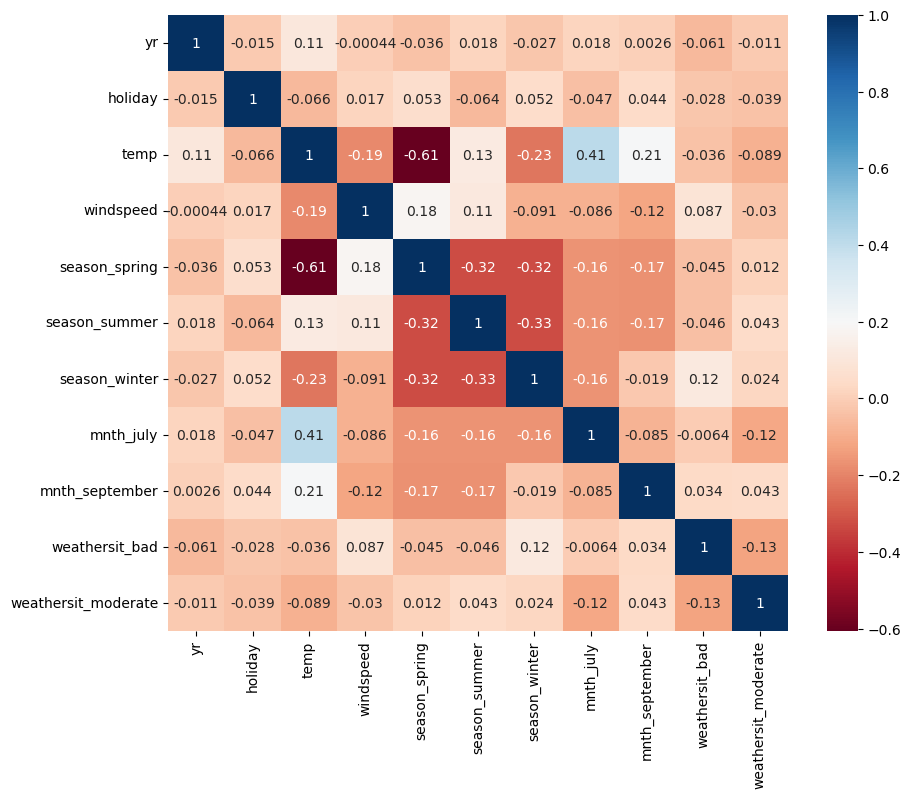

In [57]:
# Ploting correlation between the features
plt.figure(figsize=(10,8))
sns.heatmap(df_train[features].corr(), annot =True, cmap= 'RdBu')
plt.show()

        - We can see 'mnth_july' is highly correlated to 'temp'
        - Verifying by removing 'mnth_july' the model gets better or not.

In [58]:
# Manual feature elemination
features.remove('mnth_july')

In [59]:
# Summary and VIF value of the linear Model 6 
print(built_OLS_model(features))
print(get_vif(features))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          1.47e-186
Time:                        12:58:14   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1909    

## Model Prediction

In [60]:
# Final features selected
features_final = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer',
           'season_winter', 'mnth_september', 'weathersit_bad', 'weathersit_moderate']


In [61]:
# Final train dataset 
X_train_final = X_train[features_final]

In [62]:
# Add constant variable
X_train_final = sm.add_constant(X_train_final)

In [63]:
# Build the final model
lm_final = LinearRegression()
lm_final.fit(X_train_final, y_train)

LinearRegression()

## Residual Analysis

In [64]:
# Predict y value from the final model
y_train_pred = lm_final.predict(X_train_final)

In [65]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_true=y_train, y_pred= y_train_pred)
print('Mean Squared Error :',mse)

r2 = r2_score(y_true= y_train, y_pred= y_train_pred)
print('R2_Score :',r2)

Mean Squared Error : 0.008409128123522073
R2_Score : 0.8327073211549113


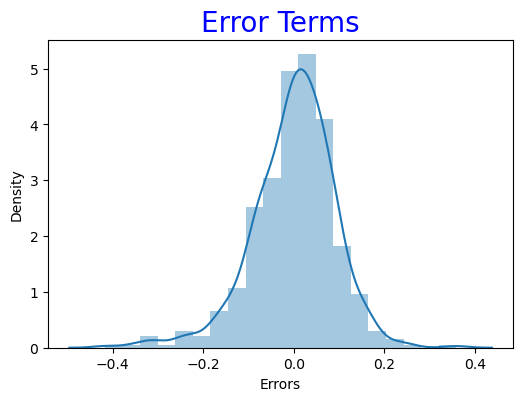

In [66]:
# Plot the error terms
residual = y_train - y_train_pred
plt.figure(figsize=(6,4))
sns.distplot(residual, bins=20)
plt.title('Error Terms',color= 'Blue',fontsize= 20)
plt.xlabel('Errors' )
plt.show()

        - From the above plot, we can see that the Residuals are normally distributed.
        - Hence our assumption for Linear Regression is valid.

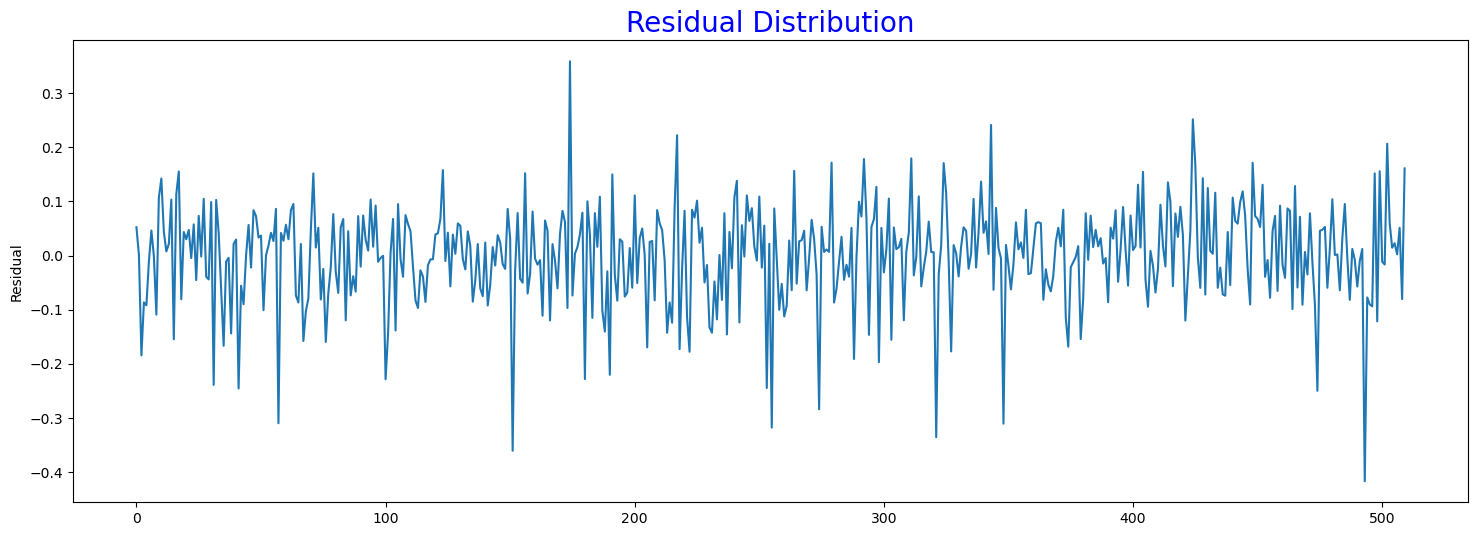

In [67]:
l= [ i for i in range( 0, len(X_train), 1 ) ]

plt.figure(figsize=(18,6))
sns.lineplot(x=l, y= residual )
plt.title('Residual Distribution', fontsize=20,color= 'Blue')
plt.ylabel('Residual')
plt.show()

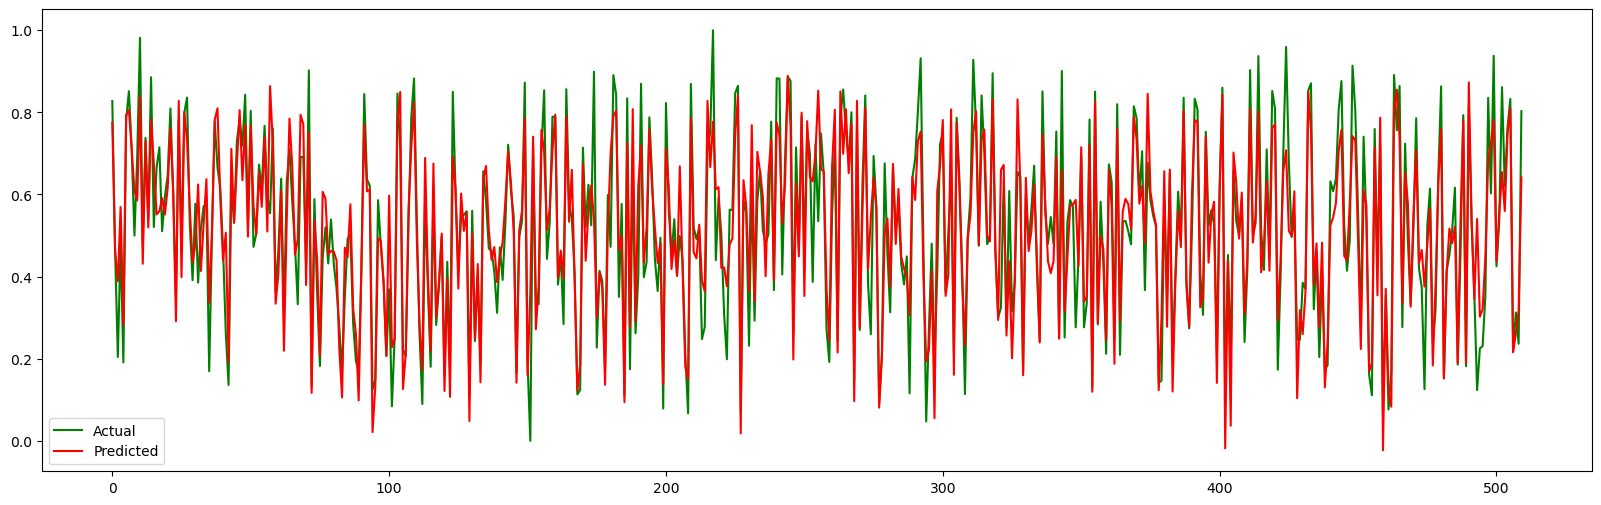

In [68]:
# Actual VS Predicted

l = [ i for i in range ( 0,len(X_train),1 ) ]

plt.figure(figsize=(20,6))
plt.plot(l, y_train, color= 'green', label='Actual')
plt.plot(l, y_train_pred, color= 'red',label='Predicted')
plt.legend()
plt.show()

        - Actual and predicted almost follows the same pattern.

### Linearity Test

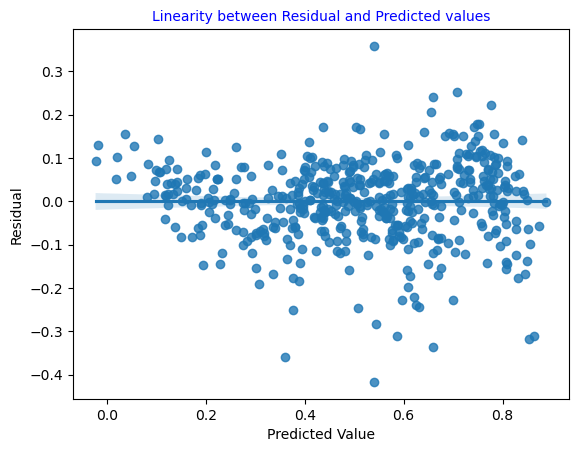

In [69]:
sns.regplot(x=y_train_pred, y= residual)
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.title('Linearity between Residual and Predicted values',fontsize=10,color='Blue')
plt.show()

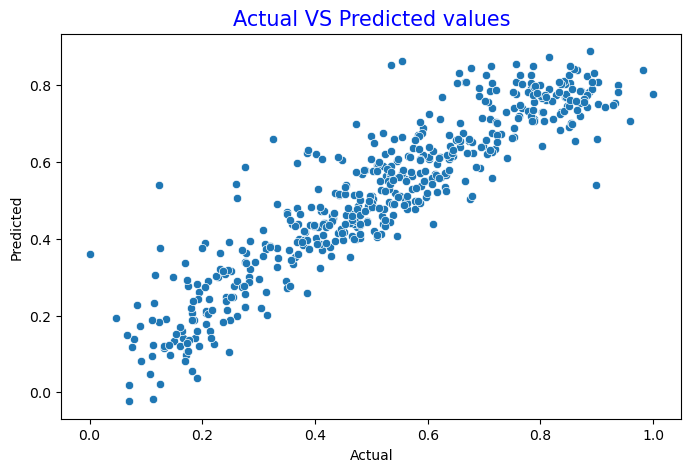

In [70]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_train, y=y_train_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted values',fontsize=15,color='Blue')
plt.show()

        - From the above plot it clearly shows that linear Relationship between Actual  and Predicted

## Predict the values for test dataset

In [71]:
# Shape of the test dataset
df_test.shape

(220, 31)

In [72]:
# Describe the test dataset
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_september,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,20.808400,24.250312,61.934025,12.598352,4560.559091,0.254545,0.263636,...,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.654545,0.318182
std,0.500809,0.187620,0.480828,7.672796,8.281075,14.429542,4.973534,1904.968544,0.436599,0.441609,...,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.476601,0.466833
min,0.000000,0.000000,0.000000,3.957390,4.941955,25.416700,1.500244,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.119375,17.090025,51.354200,9.031466,3312.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.790424,24.700000,60.708350,12.188004,4582.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,27.299153,31.124313,72.179375,15.385361,5913.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,27.999836,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
# Scale the test dataset , In test we use onle scaler.transform
df_test[num_col] = scaler.transform(df_test[num_col])

In [74]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_september,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.654545,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.476601,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
# Dividing test dataset into X and y.
y_test = df_test.pop('cnt')
X_test = df_test

In [76]:
# List of columns in X_test
X_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_august',
       'mnth_december', 'mnth_february', 'mnth_january', 'mnth_july',
       'mnth_june', 'mnth_march', 'mnth_may', 'mnth_november', 'mnth_october',
       'mnth_september', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_bad',
       'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [77]:
# Final list of features our model build
features_final

['yr',
 'holiday',
 'temp',
 'windspeed',
 'season_spring',
 'season_summer',
 'season_winter',
 'mnth_september',
 'weathersit_bad',
 'weathersit_moderate']

In [78]:
# Now let's use our model to make predictions.

# Creating X_test_final dataframe by dropping variables from X_test
X_test_final = X_test[features_final]

In [79]:
# Our final test dataframe looks
X_test_final.head()

,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,mnth_september,weathersit_bad,weathersit_moderate
instant,,,,,,,,,,
185,0,1,0.831783,0.084219,0,0,0,0,0,1
536,1,0,0.901354,0.153728,0,1,0,0,0,0
300,0,0,0.511964,0.334206,0,0,1,0,0,1
222,0,0,0.881625,0.339570,0,0,0,0,0,0
153,0,0,0.817246,0.537414,0,1,0,0,0,0


In [80]:
# Add constant to test dataset
X_test_final = sm.add_constant(X_test_final)


In [81]:
# Predict on test dataset
y_test_pred = lm_final.predict(X_test_final)

In [82]:
# Finding the mean squared error between actual and predicted in test dataset
mse_test = mean_squared_error(y_pred= y_test_pred, y_true= y_test)

print ( 'MSE Test : ', mse_test)

# Finding the R-squared score
r2_score_test = r2_score( y_true=y_test, y_pred=y_test_pred )
print('R2 Score Test : ',r2_score_test)

print('-'*50)
# Printing the train value 
print('MSE Train : ',mse)
print('R2 Score Train : ',r2)


MSE Test :  0.009380224523815593
R2 Score Test :  0.803819599072884
--------------------------------------------------
MSE Train :  0.008409128123522073
R2 Score Train :  0.8327073211549113


In [83]:
# Calculate adjusted r2 score for test set
n= X_test_final.shape[0]
p= X_test_final.shape[1]
adjusted_r2 = 1 - ( (1-r2_score_test) * (n-1) ) / (n-p-1)
adjusted_r2

0.7934446740238539

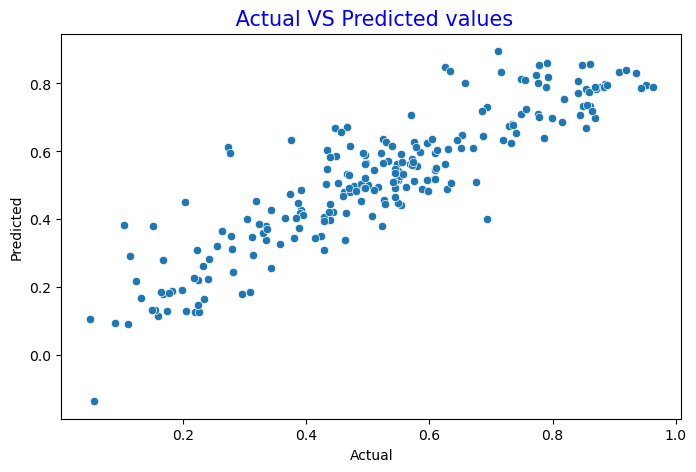

In [84]:
# Plot Actual and predicted value in test dataset
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(' Actual VS Predicted values',fontsize=15,color='Blue')
plt.show()

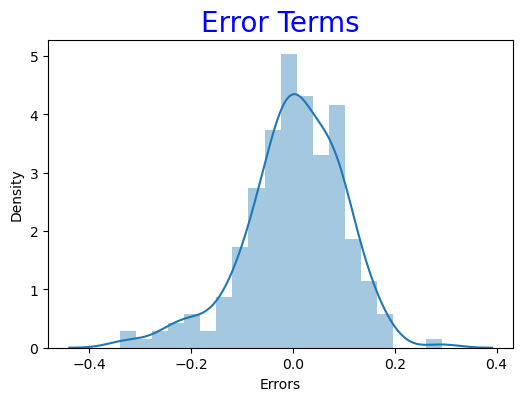

In [85]:
# Plot the error terms
residual_test = y_test - y_test_pred
plt.figure(figsize=(6,4))
sns.distplot(residual_test, bins=20)
plt.title('Error Terms',color= 'Blue',fontsize= 20)
plt.xlabel('Errors' )
plt.show()

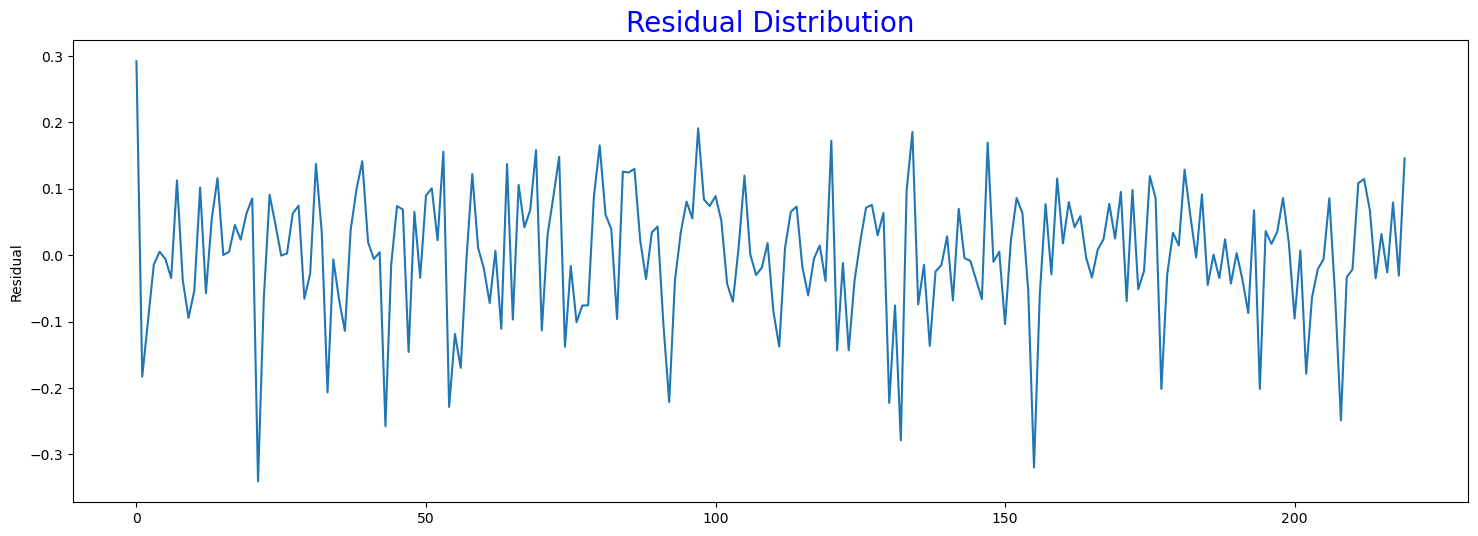

In [86]:
l= [ i for i in range( 0, len(X_test), 1 ) ]

plt.figure(figsize=(18,6))
sns.lineplot(x=l, y= residual_test )
plt.title('Residual Distribution', fontsize=20,color= 'Blue')
plt.ylabel('Residual')
plt.show()

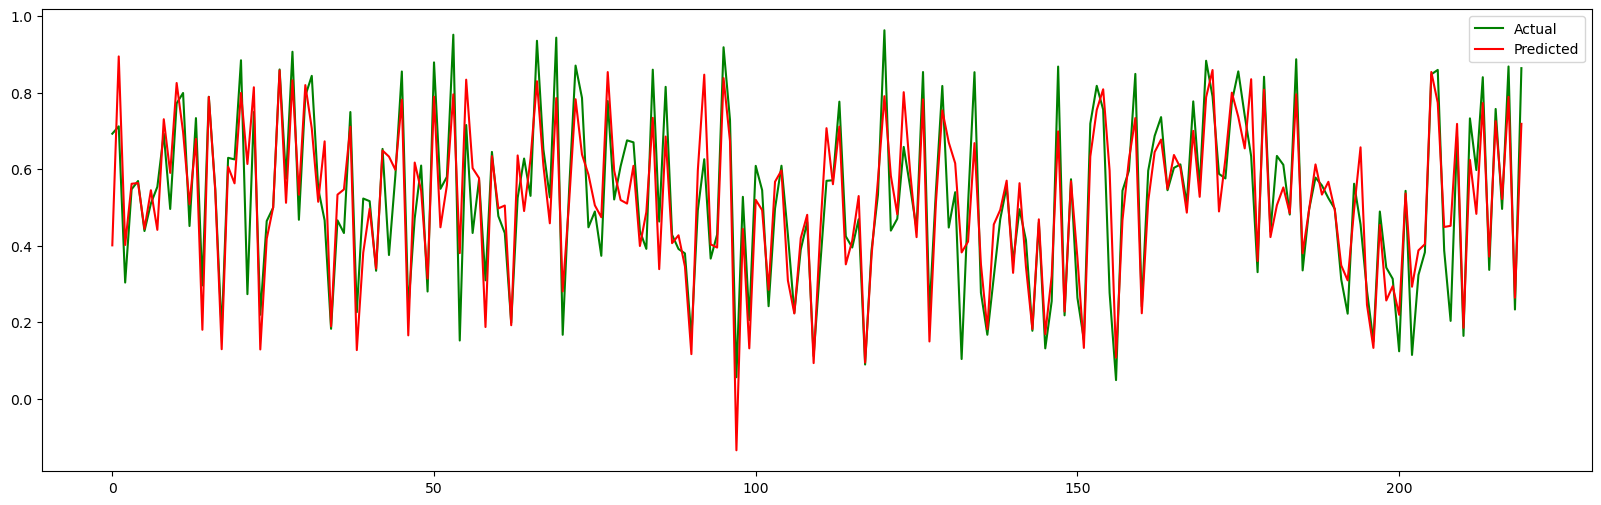

In [87]:
l = [ i for i in range ( 0,len(X_test),1 ) ]

plt.figure(figsize=(20,6))
plt.plot(l, y_test, color= 'green', label='Actual')
plt.plot(l, y_test_pred, color= 'red',label='Predicted')
plt.legend()
plt.show()

#### R-Squared Comparision
        - R-Squared Train                 --> 0.832  
        - R-Squared Test                  -->  0.804
        - Adjusted R-Squared Train  --> 0.829
        - Adjusted R-Squared Test   --> 0.793

#### Weathersit References
  
    weathersit_good         : Clear, Few clouds, Partly cloudy, Partly cloudy
    weathersit_moderate : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    weathersit_bad          : Light Snow, Light Rain + Thunderstorm + Scattered clouds, 
                                            Light Rain + Scattered clouds 
    weathersit_severe     : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

#### Top three predictor values are:
    - 'temp'-temperature in celsiuus 
               Coefficient value -->   +0.4777 
               Indicates that a unit increase in temp, there is an increase in bike demand in 0.48 times.
                                             
    - 'weatherst_bad'- Light snow, Light rain + Thunderstorm + Scatter clouds,       
                                   Light rain + Scatter clouds 
               Coefficient value -->   -0.2850  
               Indicates that a unit increase in weathersit_bad, 
                                       there is an decrease in bike demand in 0.29 times.                                 
                    
    - 'yr'- year 
               Coefficient value -->   + 0.2341  
               Indicates that a unit increase in year, there is an increase in bike demand in 0.23 times.

#### Significant variable to predict the demand of bikes
     - yr
     - holiday
     - temp
     - windspeed
     - season (winter, summer, spring)
     - mnth_september
     - weathersit (bad and moderate)
     